In [1]:
import networkx as nx
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# load connectivity matrix
connectivity_m = scipy.io.loadmat('/Users/armanimanov/Desktop/output_connectivity/100206.tt.gz.BrainSeg.mean_length.end.connectivity.mat').get('connectivity')

In [3]:
# create weighted graph by using matrix values as edge weights
weighted = nx.from_numpy_array(connectivity_m)

# create unweighted graph by using 1 for all non-zero values in the matrix
unweighted = nx.from_numpy_array(np.where(connectivity_m > 0, 1, 0))

In [4]:
# determine the shortest path lengths between all pairs of nodes in both w / uw graphs
paths_w = dict(nx.shortest_path_length(weighted, weight='weight'))
paths_uw = dict(nx.shortest_path_length(unweighted), weight=None)

### verify there are differences between weighted and unweighted

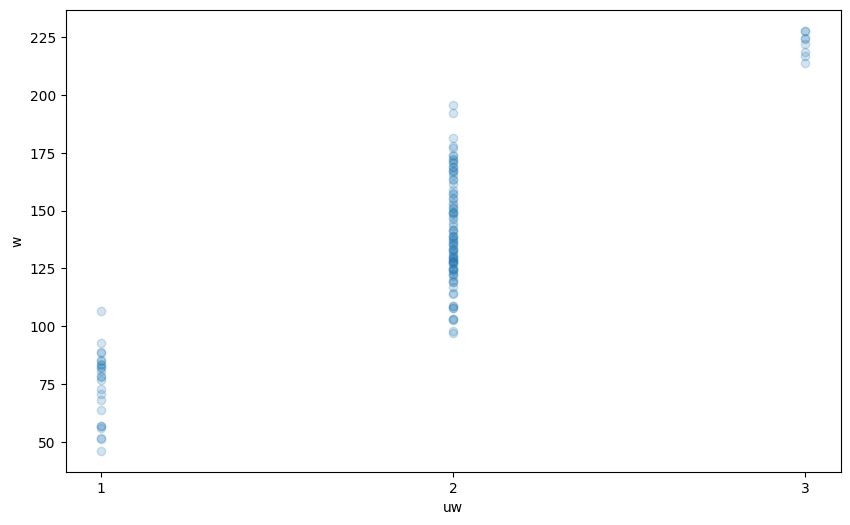

In [24]:
lengths_w = []
lengths_uw = []
node_pairs = []

for origin_node in paths_w:
    for target_node, length in paths_w[origin_node].items():
        if origin_node != target_node:  # don't want paths to self
            lengths_w.append(length)
            lengths_uw.append(paths_uw[origin_node][target_node])
            node_pairs.append((origin_node, target_node))

# scatterplot of shortest path lengths
plt.figure(figsize=(10, 6))
plt.scatter(lengths_uw, lengths_w, alpha=0.1)
plt.xlabel('uw')
plt.ylabel('w')
plt.xticks(range(int(min(lengths_uw)), int(max(lengths_uw))+1))
plt.show()



### Gather info on paths that are 2-hop and *shorter* than 1-hop

In [7]:
# Create separate lists for uw categories "1" and "2"
lengths_uw_1 = []
lengths_uw_2 = []

for i in range(len(lengths_uw)):
    if lengths_uw[i] == 1:
        lengths_uw_1.append((lengths_uw[i], lengths_w[i]))
    elif lengths_uw[i] == 2:
        lengths_uw_2.append((lengths_uw[i], lengths_w[i]))

# Find the maximum length in uw category "1"
max_length_uw_1 = max(lengths_uw_1, key=lambda x: x[1])[1]

# Filter paths in uw category "2" that are shorter than the maximum in uw category "1"
filtered_paths_uw_2 = [path for path in lengths_uw_2 if path[1] < max_length_uw_1]

# Print the maximum length in uw category "1"
print("Maximum val in uw category '1':", max_length_uw_1)

# Print the filtered paths in uw category "2"
print("Paths in uw category '2' shorter than the maximum in uw category '1':")
for path in filtered_paths_uw_2:
    print(f"Path with val {path[1]} (uw category {path[0]})")

Maximum length in uw category '1': 106.77420806884766
Paths in uw category '2' shorter than the maximum in uw category '1':
Path with length 102.92927932739258 (uw category 2)
Path with length 97.87579727172852 (uw category 2)
Path with length 102.76469421386719 (uw category 2)
Path with length 97.11110305786133 (uw category 2)
Path with length 97.87579727172852 (uw category 2)
Path with length 102.92927932739258 (uw category 2)
Path with length 103.06763076782227 (uw category 2)
Path with length 97.11110305786133 (uw category 2)
Path with length 102.76469421386719 (uw category 2)
Path with length 103.06763076782227 (uw category 2)


In [22]:
for origin, paths in paths_w.items():
    for target, length in paths.items():
        if origin != target:
            print(f"shortest_path_length from {origin} to {target}:")
            print(f"-->w graph: {length}")
            print(f"-->uw graph: {paths_uw[origin][target]}")


shortest_path_length from 0 to 18:
-->w graph: 46.11110305786133
-->uw graph: 1
shortest_path_length from 0 to 21:
-->w graph: 51.0
-->uw graph: 1
shortest_path_length from 0 to 11:
-->w graph: 51.76469421386719
-->uw graph: 1
shortest_path_length from 0 to 10:
-->w graph: 56.81817626953125
-->uw graph: 1
shortest_path_length from 0 to 22:
-->w graph: 56.95652770996094
-->uw graph: 1
shortest_path_length from 0 to 2:
-->w graph: 68.07074737548828
-->uw graph: 1
shortest_path_length from 0 to 7:
-->w graph: 70.66667175292969
-->uw graph: 1
shortest_path_length from 0 to 5:
-->w graph: 72.88983154296875
-->uw graph: 1
shortest_path_length from 0 to 8:
-->w graph: 76.5999984741211
-->uw graph: 1
shortest_path_length from 0 to 4:
-->w graph: 78.31279754638672
-->uw graph: 1
shortest_path_length from 0 to 6:
-->w graph: 80.66154479980469
-->uw graph: 1
shortest_path_length from 0 to 1:
-->w graph: 82.1822738647461
-->uw graph: 1
shortest_path_length from 0 to 3:
-->w graph: 84.8606033325195